## Data Understanding/Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.feature_extraction import FeatureHasher
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



**Displaying first 5 rows to understand the Structure**  


In [3]:
df = pd.read_csv("data/new_jobsfr_global.csv")
df.head()

,job_id,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,...,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,remote_type,skills_list,skills_count
0,AI00001,AI Research Scientist,90376,Senior-Level,Contract,China,Medium (50-250),China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",...,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,Hybrid,"['tableau', 'pytorch', 'kubernetes', 'linux', ...",5
1,AI00002,AI Software Engineer,61895,Entry-Level,Contract,Canada,Medium (50-250),Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",...,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,Fully Remote,"['deep learning', 'aws', 'mathematics', 'pytho...",5
2,AI00003,AI Specialist,152626,Mid-Level,Freelance,Switzerland,Large (>250),South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",...,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,Onsite,"['kubernetes', 'deep learning', 'java', 'hadoo...",5
3,AI00004,NLP Engineer,80215,Senior-Level,Freelance,India,Medium (50-250),India,50,"Scala, SQL, Linux, Python",...,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems,Hybrid,"['scala', 'sql', 'linux', 'python']",4
4,AI00005,AI Consultant,54624,Entry-Level,Part-Time,France,Small (<50),Singapore,100,"MLOps, Java, Tableau, Python",...,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics,Fully Remote,"['mlops', 'java', 'tableau', 'python']",4


**Displaying general dataset information to understand data-types and null counts**

The dataset used for this analysis contains 15000 samples

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   experience_level        15000 non-null  object 
 4   employment_type         15000 non-null  object 
 5   company_location        15000 non-null  object 
 6   company_size            15000 non-null  object 
 7   employee_residence      15000 non-null  object 
 8   remote_ratio            15000 non-null  int64  
 9   required_skills         15000 non-null  object 
 10  education_required      15000 non-null  object 
 11  years_experience        15000 non-null  int64  
 12  industry                15000 non-null  object 
 13  posting_date            15000 non-null  object 
 14  application_deadline    15000 non-null

**Checking for duplications**

0 Duplcations Found

In [5]:
df.duplicated().sum()

0

**Dataset Summary**

This dataset comprises 15,000 job postings across 20 locations, 20 job titles, and 15 industries. Salaries range from $32k-$399k (median $99k). Most of the roles are Full-Time, Mid-Level, and from small companies. Jobs require about 6 years of experience and list ~4 skills on average. The dataset is clean and diverse, and well-suited for both exploratory analysis and modeling.

In [6]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
job_id,15000,15000,AI00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,15000,20,Machine Learning Researcher,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_usd,15000.0,NaN,NaN,NaN,115348.965133,60260.940438,32519.0,70179.75,99705.0,146408.5,399095.0
experience_level,15000,4,Mid-Level,3781,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,15000,4,Full-Time,3812,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_location,15000,20,Germany,814,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_size,15000,3,Small (<50),5007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employee_residence,15000,20,Sweden,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,15000.0,NaN,NaN,NaN,49.483333,40.812712,0.0,0.0,50.0,100.0,100.0
required_skills,15000,13663,"Python, TensorFlow, PyTorch",17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Set 'job_id' as the DataFrame index to uniquely identify each job posting.**

In [7]:
df.set_index('job_id')


,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,remote_type,skills_list,skills_count
job_id,,,,,,,,,,,,,,,,,,,,
AI00001,AI Research Scientist,90376,Senior-Level,Contract,China,Medium (50-250),China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,Hybrid,"['tableau', 'pytorch', 'kubernetes', 'linux', ...",5
AI00002,AI Software Engineer,61895,Entry-Level,Contract,Canada,Medium (50-250),Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,Fully Remote,"['deep learning', 'aws', 'mathematics', 'pytho...",5
AI00003,AI Specialist,152626,Mid-Level,Freelance,Switzerland,Large (>250),South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,Onsite,"['kubernetes', 'deep learning', 'java', 'hadoo...",5
AI00004,NLP Engineer,80215,Senior-Level,Freelance,India,Medium (50-250),India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems,Hybrid,"['scala', 'sql', 'linux', 'python']",4
AI00005,AI Consultant,54624,Entry-Level,Part-Time,France,Small (<50),Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics,Fully Remote,"['mlops', 'java', 'tableau', 'python']",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AI14996,Robotics Engineer,38604,Entry-Level,Freelance,Finland,Small (<50),Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics,Hybrid,"['java', 'kubernetes', 'azure']",3
AI14997,Machine Learning Researcher,57811,Entry-Level,Contract,United Kingdom,Medium (50-250),United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics,Onsite,"['mathematics', 'docker', 'sql', 'deep learning']",4
AI14998,NLP Engineer,189490,Executive,Contract,South Korea,Large (>250),South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations,Hybrid,"['scala', 'spark', 'nlp']",3


**20 unique job titles**

In [8]:
df['job_title'].nunique()

20

**Checking count of each unique job title**

In [9]:
df['job_title'].value_counts()


job_title
Machine Learning Researcher    808
AI Software Engineer           784
Autonomous Systems Engineer    777
Machine Learning Engineer      772
AI Architect                   771
Head of AI                     765
NLP Engineer                   762
Robotics Engineer              759
Data Analyst                   759
AI Research Scientist          756
Data Engineer                  749
AI Product Manager             743
Research Scientist             742
Principal Data Scientist       734
AI Specialist                  728
ML Ops Engineer                725
Computer Vision Engineer       724
Data Scientist                 720
Deep Learning Engineer         718
AI Consultant                  704
Name: count, dtype: int64

**20 unique Company locations**

In [10]:
df['company_location'].nunique()


20

**Checking count of each unique country**

In [11]:
df['company_location'].value_counts()


company_location
Germany           814
Denmark           778
France            769
Canada            769
Austria           765
Singapore         764
China             763
India             754
Sweden            752
Israel            751
Ireland           750
Switzerland       746
Finland           733
Japan             733
Australia         732
Netherlands       731
United Kingdom    729
United States     724
South Korea       722
Norway            721
Name: count, dtype: int64

**Salarys Table for "Job_title"**

The table below shows the maximum, minimum, and average salaries for each job title in USD . This makes it easier to compare how compensation varies across different roles and identify the highest- and lowest-paying job titles
From this table we can see the highes paid job title is AI Architect

In [17]:
job_salary = df.groupby('job_title')['salary_usd'].agg(['max', 'min', 'mean'])

job_salary_formatted = job_salary.applymap(lambda x: f"${x:,.0f}")
job_salary_formatted


,max,min,mean
job_title,,,
AI Architect,"$398,084","$33,220","$117,437"
AI Consultant,"$325,757","$33,959","$113,672"
AI Product Manager,"$381,575","$33,770","$114,681"
AI Research Scientist,"$394,917","$33,092","$117,898"
AI Software Engineer,"$379,418","$33,013","$114,273"
AI Specialist,"$390,292","$34,174","$120,571"
Autonomous Systems Engineer,"$364,585","$32,790","$111,397"
Computer Vision Engineer,"$366,957","$32,519","$113,473"
Data Analyst,"$361,541","$32,542","$111,321"


**Corealation Matrix Analysis**


*Salary vs Years of Experience:*

It shows a strong positive correlation, 0.74, which implies that with more experience, salaries rise considerably.

*Salary vs. Remote Ratio:*

This shows almost no correlation of 0.01; therefore, salary levels are hardly affected by working remotely or on-site.

*Salary vs. Job Description Lenght:*

There is no meaningful correlation (-0.009). More or less wordy job descriptions do not impact salary.

*Salary vs Benefits Score:* 

Shows near-zero correlation at 0.0009, indicating that the benefits rating isn't linked to a higher salary.

 *Salary vs Skills Count:*
 
 Shows slight negative correlation, indicating that salary cannot be predicted by the number of listed skills: -0.013.
 
 *Inter-feature Correlations:*
  
  All other feature pairs present weak or negligible correlations, which would suggest that most numeric features are independent of each other.

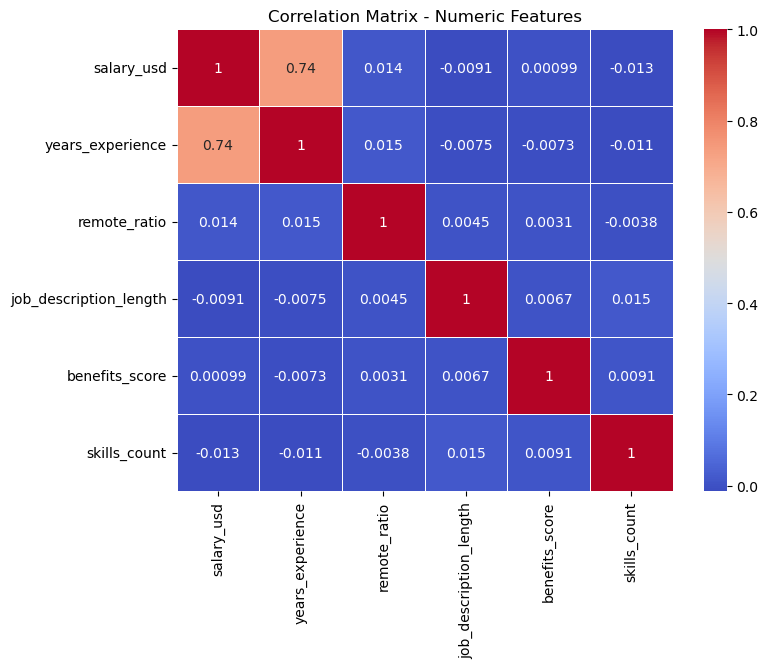

In [13]:

numeric_cols = [
    'salary_usd',
    'years_experience',
    'remote_ratio',
    'job_description_length',
    'benefits_score',
    'skills_count'
]

corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix - Numeric Features")
plt.show()


**Pairplot Analysis (Numeric Features)**

*Salary vs Years of Experience:*

A clear upward trend appears, confirming a strong positive relationship: higher experience generally leads to higher salary.


c:\Users\waqar\miniconda3\envs\dmml\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


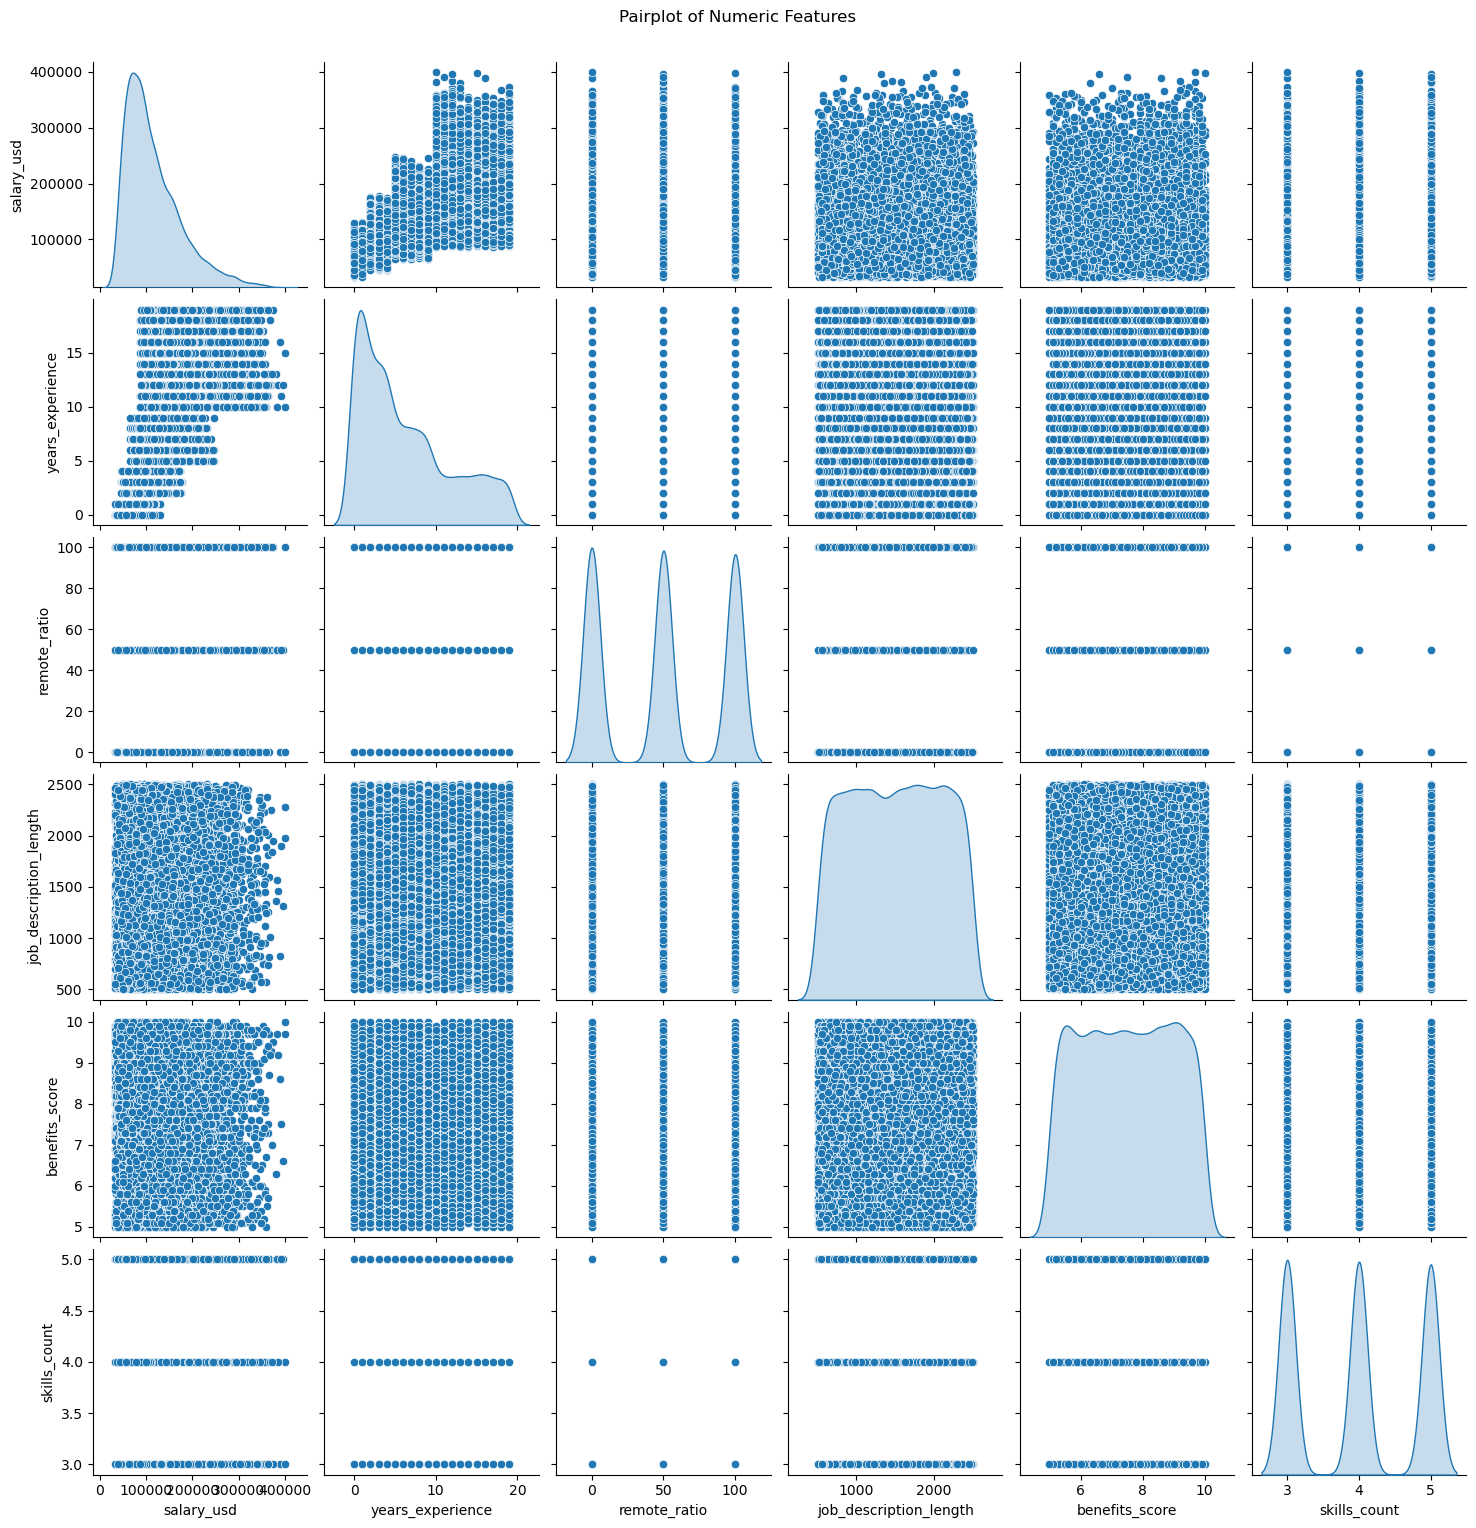

In [14]:
sns.pairplot(df[numeric_cols], diag_kind="kde")
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

**Encode categorical features, combines all relevant columns, trains a Random Forest model, and calculates which features are most important for predicting salary.**

In [19]:

categorical_cols = [
    'experience_level',
    'employment_type',
    'company_size',
    'industry',
    'company_location',
    'remote_type'
]

# Label encode each categorical column
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Numeric columns
numeric_cols = [
    'years_experience',
    'skills_count',
    'benefits_score',
    'remote_ratio',
    'job_description_length'
]

# Combine all features
X = df[categorical_cols + numeric_cols]
y = df['salary_usd']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Random Forest model
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)



**Feature Importance Barplot**

From this barplot we can tell that *years_experience* has the highest importance on determining the *salary_usd* followed by *company_location, experience_level and company_size" all other features dont have much affect on *salary_usd*

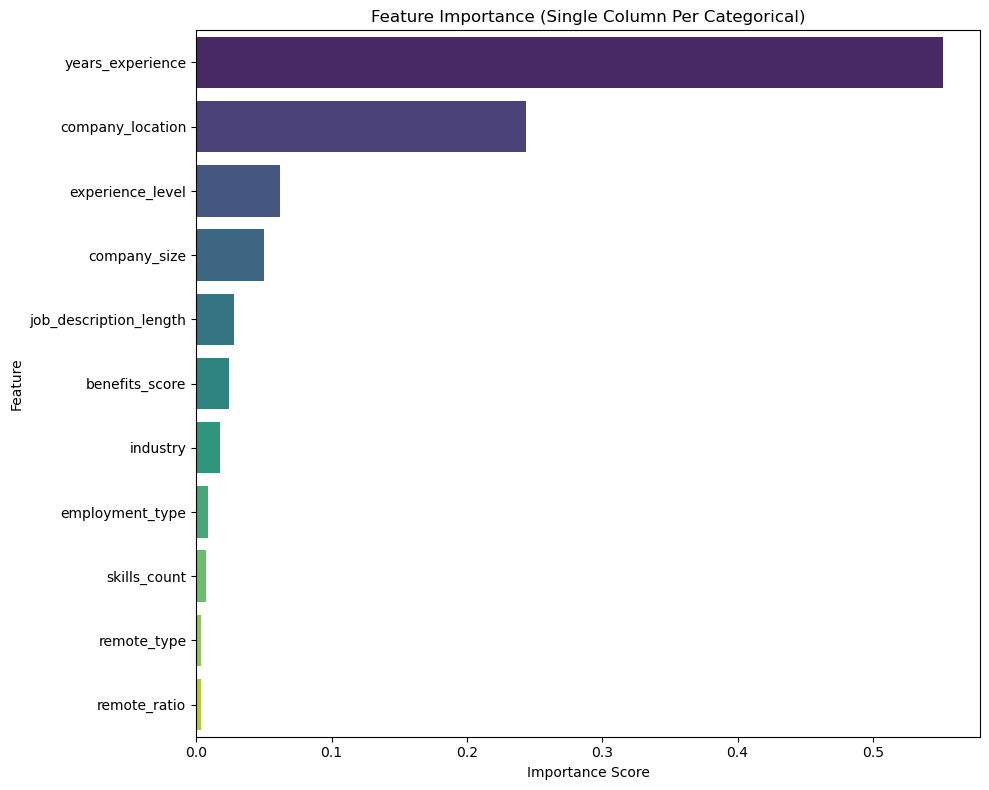

In [20]:
plt.figure(figsize=(10, 8))
sns.barplot(
    x=importances_sorted,
    
    y=importances_sorted.index,
    hue=importances_sorted.index,     
    legend=False,                     
    palette="viridis"
)
plt.title("Feature Importance (Single Column Per Categorical)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()